<a href="https://colab.research.google.com/github/NealYa11/Wine-Quality/blob/main/Wine_QualityN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#импорт kaggle.json
from google.colab import files
files.upload()

In [ ]:
#Подготовка для работы с Kaggle
!pip install -q kaggle

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d rajyellow46/wine-quality

  0% 0.00/98.0k [00:00<?, ?B/s]
100% 98.0k/98.0k [00:00<00:00, 93.9MB/s]


In [6]:
# Распаковка скачанных данных
!unzip wine-quality.zip

Archive:  wine-quality.zip
  inflating: winequalityN.csv        


О наборе данных
Информация о наборе данных:

Набор данных был загружен из репозитория машинного обучения UCI.

Два набора данных относятся к красному и белому вариантам португальского вина «Виньо Верде». Ссылка [Кортез и др., 2009]. Из соображений конфиденциальности и логистики доступны только физико-химические (входные) и сенсорные (выходные) переменные (например, отсутствуют данные о сортах винограда, марке вина, отпускной цене вина и т. д.).

Эти наборы данных можно рассматривать как задачи классификации или регрессии. Классы упорядочены и не сбалансированы (например, нормальных вин намного больше, чем отличных или плохих). Алгоритмы обнаружения выбросов можно использовать для обнаружения нескольких отличных или плохих вин. Кроме того, мы не уверены, все ли входные переменные актуальны. Поэтому было бы интересно протестировать методы выбора функций.

Два набора данных были объединены, и несколько значений были удалены случайным образом.

Информация об атрибутах:

Подробнее читайте в [Cortez et al., 2009].

Входные переменные (на основе физико-химических тестов):

1 - фиксированная кислотность

2 - летучая кислотность

3 - лимонная кислота

4 - остаточный сахар

5 - хлориды

6 - свободный диоксид серы

7 - общий диоксид серы

8 - плотность

9 - pH

10 - сульфаты

11 - спирт

Выходная переменная (на основе сенсорных данных):

12 – качество (оценка от 0 до 10).

Благодарности:

П. Кортес, А. Сердейра, Ф. Алмейда, Т. Матос и Х. Рейс.
Моделирование винных предпочтений путем интеллектуального анализа данных по физико-химическим свойствам. В системах поддержки принятия решений, Elsevier, 47(4):547-553, 2009.

In [ ]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [7]:
# Знакомство с датасетом
df=pd.read_csv("winequalityN.csv")
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<ipython-input-8-da3ae1d6888a>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


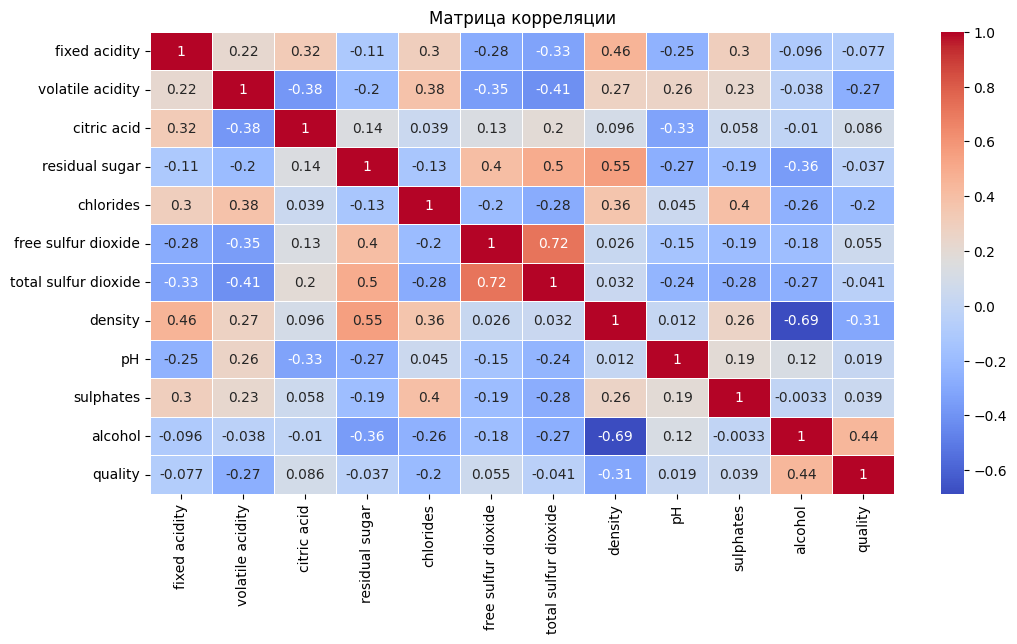

In [8]:
# Проведем базовый анализ данных (EDA)
# Например, построим матрицу корреляции и гистограммы

# Матрица корреляции
corr_matrix = df.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Матрица корреляции')
plt.show()

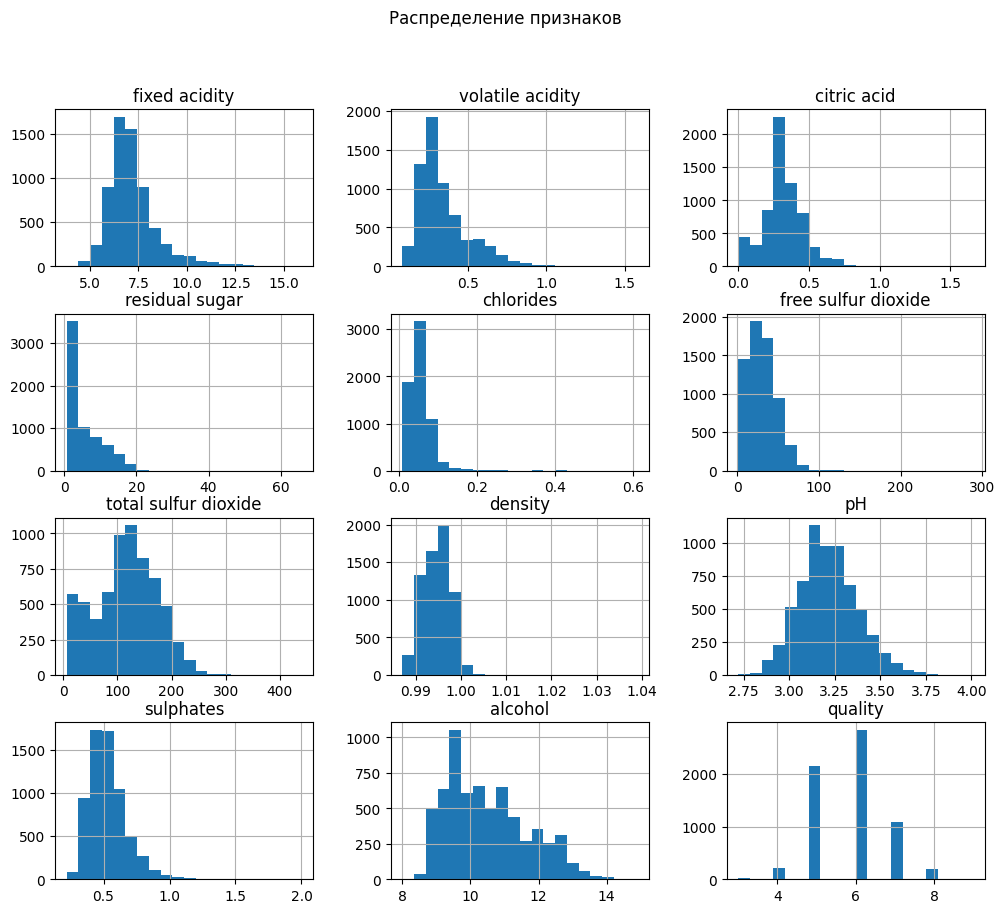

In [9]:
# Гистограммы распределения признаков
df.hist(bins=20, figsize=(12, 10))
plt.suptitle('Распределение признаков')
plt.show()

In [10]:
# Замещение пропусков на среднее значение в каждом столбце
df.fillna(df.mean(), inplace=True)

<ipython-input-10-51352de5879c>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [11]:

# Создание экземпляра LabelEncoder
label_encoder = LabelEncoder()

# Применение LabelEncoder к столбцу 'type'
df['type'] = label_encoder.fit_transform(df['type'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [13]:
# Разделение данных на обучающий и тестовый наборы
X = df.drop('quality', axis=1)  # Входные признаки
y = df['quality']  # Целевая переменная

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [15]:

# Создание экземпляра StandardScaler
scaler = StandardScaler()

# Нормализация входных признаков в обучающем и тестовом наборах
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Построение модели регрессии на нормализованных данных
regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train)

LinearRegression()

In [17]:
# Оценка модели на тестовых данных
y_pred = regression_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.545085209042467
R-squared: 0.29033838315831584


In [18]:

#  MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

MAE: 0.5734121446910565


In [19]:


# Создание экземпляра модели регрессионного дерева
tree_model = DecisionTreeRegressor(random_state=10)

# Обучение модели на обучающем наборе
tree_model.fit(X_train_scaled, y_train)

# предсказание на тестовом наборе
y_pred_tree = tree_model.predict(X_test_scaled)

In [20]:

# Вычисление MAE
mae_tree = mean_absolute_error(y_test, y_pred_tree)
print(f'MAE for Decision Tree: {mae_tree}')

# Вычисление MSE
mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f'MSE for Decision Tree: {mse_tree}')

# Вычисление RMSE
rmse_tree = np.sqrt(mse_tree)
print(f'RMSE for Decision Tree: {rmse_tree}')

MAE for Decision Tree: 0.49923076923076926
MSE for Decision Tree: 0.7161538461538461
RMSE for Decision Tree: 0.8462587347577845


In [21]:
import joblib

# Сохранение обученной модели в файл
joblib.dump(tree_model, 'trained_decision_tree_model.pkl')

# Позже  можно загрузить модель обратно из файла
# loaded_model = joblib.load('trained_decision_tree_model.pkl')